Generation 0 | Best distance: 47.96671279941292
Generation 100 | Best distance: 29.48686709820851
Generation 200 | Best distance: 22.36930466578515
Generation 300 | Best distance: 20.044954193927477
Generation 400 | Best distance: 18.22780021935832
Generation 500 | Best distance: 17.3204325312809
Generation 600 | Best distance: 15.82413802810291
Generation 700 | Best distance: 14.795924387108226
Generation 800 | Best distance: 13.792030109535617
Generation 900 | Best distance: 12.765063537826734
Generation 1000 | Best distance: 11.779796422947156
Generation 1100 | Best distance: 11.630053015857078
Generation 1200 | Best distance: 11.200315097384356
Generation 1300 | Best distance: 10.908955345733967
Generation 1400 | Best distance: 10.876681722902067
Generation 1500 | Best distance: 10.876681722902067
Generation 1600 | Best distance: 10.876681722902067
Generation 1700 | Best distance: 10.876681722902067
Generation 1800 | Best distance: 10.876681722902067
Generation 1900 | Best distance

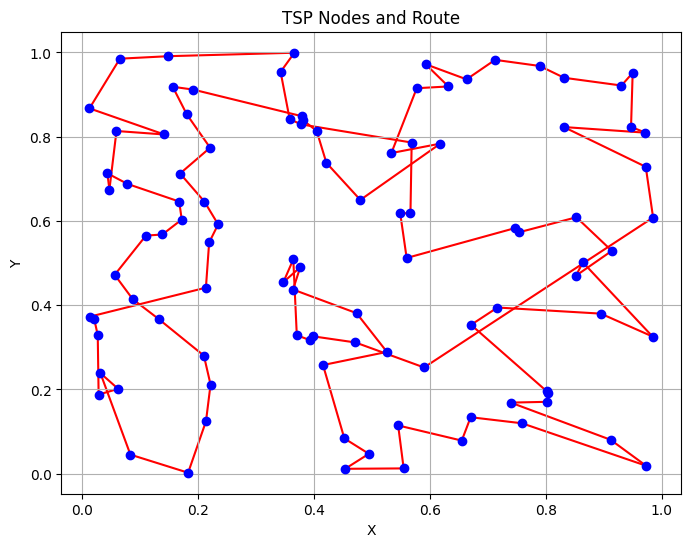

Generation 0 | Best distance: 49.000582485217485
Generation 100 | Best distance: 28.940858321493952
Generation 200 | Best distance: 20.234278150030725
Generation 300 | Best distance: 16.83934207806933
Generation 400 | Best distance: 14.384599079185262
Generation 500 | Best distance: 13.35051545101594
Generation 600 | Best distance: 12.529804473294131
Generation 700 | Best distance: 12.164124884765982
Generation 800 | Best distance: 12.11565457100319
Generation 900 | Best distance: 12.088015647983436
Generation 1000 | Best distance: 12.072260181179319
Generation 1100 | Best distance: 11.951420521077006
Generation 1200 | Best distance: 11.75529273026464
Generation 1300 | Best distance: 11.652738237211507
Generation 1400 | Best distance: 11.488741809047426
Generation 1500 | Best distance: 11.383635087827425
Generation 1600 | Best distance: 11.383635087827425
Generation 1700 | Best distance: 11.383635087827425
Generation 1800 | Best distance: 11.343480296680927
Generation 1900 | Best dista

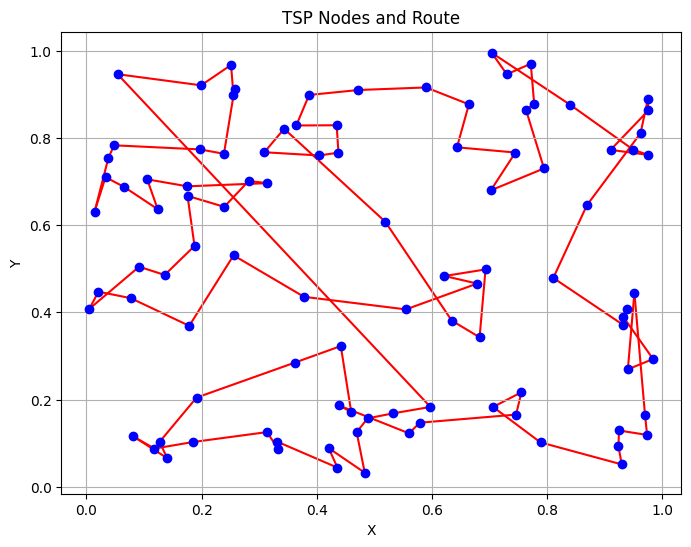

Generation 0 | Best distance: 44.68106255810415
Generation 100 | Best distance: 30.20689534716155
Generation 200 | Best distance: 24.887061293741482
Generation 300 | Best distance: 21.18037481410047
Generation 400 | Best distance: 19.561271627143498
Generation 500 | Best distance: 17.75293445789617
Generation 600 | Best distance: 16.473051528897127
Generation 700 | Best distance: 14.964636289022145
Generation 800 | Best distance: 14.541073536660951
Generation 900 | Best distance: 13.986882808622811
Generation 1000 | Best distance: 13.640583885025332
Generation 1100 | Best distance: 13.261118260228672
Generation 1200 | Best distance: 12.849711858826714
Generation 1300 | Best distance: 12.816421127270408
Generation 1400 | Best distance: 12.55805553801218
Generation 1500 | Best distance: 12.388758926733013
Generation 1600 | Best distance: 12.0117187328127
Generation 1700 | Best distance: 11.703557913212489
Generation 1800 | Best distance: 11.530513161618057
Generation 1900 | Best distance

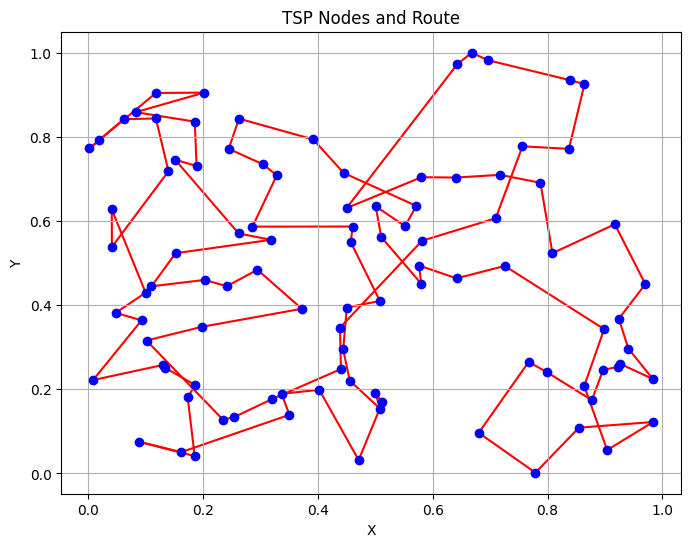

Generation 0 | Best distance: 45.07995520434362
Generation 100 | Best distance: 20.864934567960166
Generation 200 | Best distance: 16.476865604148035
Generation 300 | Best distance: 14.943686027964823
Generation 400 | Best distance: 14.124714841195917
Generation 500 | Best distance: 13.717450162447886
Generation 600 | Best distance: 13.717450162447886
Generation 700 | Best distance: 13.670122006079335
Generation 800 | Best distance: 13.670122006079335
Generation 900 | Best distance: 13.670122006079335
Generation 1000 | Best distance: 13.670122006079335
Generation 1100 | Best distance: 13.670122006079335
Generation 1200 | Best distance: 13.670122006079335
Generation 1300 | Best distance: 13.552659823542859
Generation 1400 | Best distance: 13.095861380484054
Generation 1500 | Best distance: 13.095861380484054
Generation 1600 | Best distance: 13.095861380484054
Generation 1700 | Best distance: 12.985942523862573
Generation 1800 | Best distance: 12.604202927054992
Generation 1900 | Best di

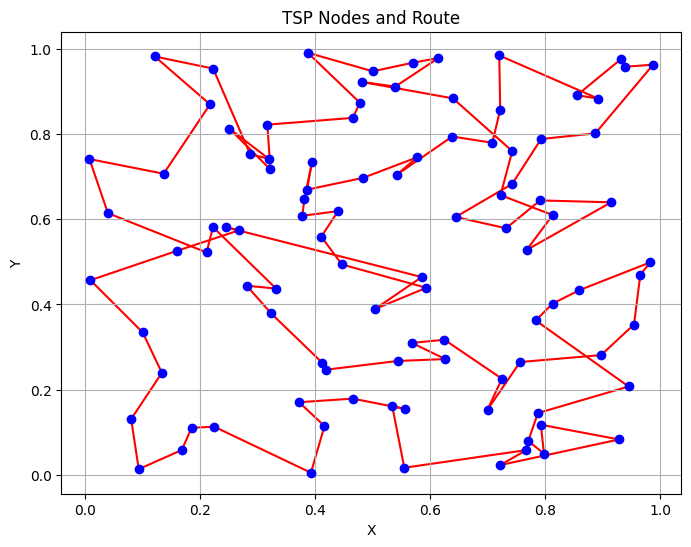

done


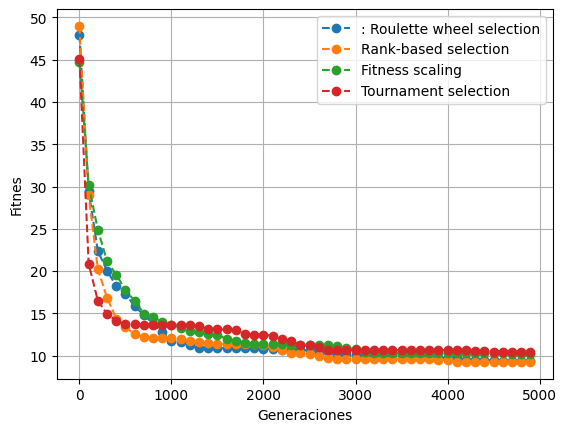

In [5]:
import numpy as np
import random
import numpy as np
import time
from datetime import datetime

from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt

history = []


# hyperparametros
pop_size = 200 #poblacion
N = 100 #Nro de ciudades
elite_size = 100
mutation_rate = 0.01
generations = 5000


def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

def nearest_neighbor_initial_solution(num_cities, distances):
    unvisited_cities = set(range(num_cities))
    current_city = np.random.choice(num_cities)  # Elegir una ciudad aleatoria como punto de partida
    tour = [current_city]
    unvisited_cities.remove(current_city)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distances[current_city][city])
        tour.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city

    return tour

def create_initial_population_hybrid(pop_size, num_cities, distances, random_portion=0.5):
    population = []
    random_population_size = int(pop_size * random_portion)
    heuristic_population_size = pop_size - random_population_size

    # Generar población aleatoria
    for _ in range(random_population_size):
        individual = list(np.random.permutation(num_cities))
        population.append(individual)

    # Mejorar soluciones aleatorias con algoritmo heurístico
    for _ in range(heuristic_population_size):
        individual = nearest_neighbor_initial_solution(num_cities, distances)
        population.append(individual)

    return population

def nearest_neighbor_initial_solution(num_cities, distances):
    unvisited_cities = set(range(num_cities))
    current_city = np.random.choice(num_cities)  # Elegir una ciudad aleatoria como punto de partida
    tour = [current_city]
    unvisited_cities.remove(current_city)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distances[current_city][city])
        tour.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city

    return tour

#create population with euristic
def create_initial_population_heuristic(pop_size, num_cities, distances):
    population = []
    for _ in range(pop_size):
        individual = nearest_neighbor_initial_solution(num_cities, distances)
        population.append(individual)
    return population

# Create initial population
def create_initial_population(pop_size, num_cities):
    population = []
    for _ in range(pop_size):
        individual = list(np.random.permutation(num_cities)) # create a random solution
        population.append(individual)
    return population

def fitness(solution): # depende del problema
  distance = 0
  for i in range(len(solution)-1):
    distance += distances[solution[i]][solution[i+1]]
  return distance

def select_elite(population, all_fitness, elite_size):   # selecciona los que tengan el menor fitness
  elite_indices = np.argsort(all_fitness)[:elite_size]
  return np.array(population)[elite_indices], elite_indices

# Selection: Roulette Wheel Selection for maximization
def roulete_wheel_selection(population, all_fitness):
    total_fitness = sum(all_fitness)
    selection_probs = [f / total_fitness for f in all_fitness]  # it works for maximization
    return population[np.random.choice(len(population), p=selection_probs)]

def fitness_scaling_selection(population, all_fitness):
 max_fitness = max(all_fitness)
 inverted_fitness = [max_fitness - f for f in all_fitness]  # invert fitness
 min_fitness = min(all_fitness)
 max_fitness = max(all_fitness)
 a = 50/(max_fitness - min_fitness)
 b = 100 - (a * max_fitness)
 total_fitness = sum(inverted_fitness)
 scaled_fitness = [a * f + b for f in all_fitness]
 selection_probs = [f / total_fitness for f in scaled_fitness]
 return population[np.random.choice(len(population), p=selection_probs)]

def tournament_selection_minimization(population, all_fitness):
    selected_candidates = []
    tournament_size = 5
    tournament_candidates = np.random.choice(len(population), size=tournament_size, replace=False)
    tournament_fitness = [all_fitness[i] for i in tournament_candidates]
    winner_index = tournament_candidates[np.argmin(tournament_fitness)]
    winner = population[winner_index]

    return winner
def fitness_scaling_selection_bck(population, all_fitness):
    epsilon = 1e-6
    adjusted_fitness = [f + epsilon for f in all_fitness]
    max_fitness = max(adjusted_fitness)
    inverted_fitness = [max_fitness - f for f in all_fitness]
    min_fitness = min(inverted_fitness)
    max_fitness = max(inverted_fitness)
    a = 50/(max_fitness - min_fitness)
    b = 100 - (a * max_fitness)
    scaled_fitness = [a * f + b for f in all_fitness]
    total_fitness = sum(scaled_fitness)
    selection_probs = [f / total_fitness for f in scaled_fitness]
    return population[np.random.choice(len(population), p=selection_probs)]

def fitness_scaling_selection(population, all_fitness):
    epsilon = 1e-6
    max_fitness = max(all_fitness)
    min_fitness = min(all_fitness)
    # Calcular a y b para el escalado de aptitudes
    a = 50 / (max_fitness - min_fitness + epsilon)
    b = 100 - (a * max_fitness)
    # Escalar las aptitudes
    scaled_fitness = [(a * f + b) for f in all_fitness]
    # Calcular la suma total de las aptitudes escaladas
    total_fitness = sum(scaled_fitness)

    # Calcular las probabilidades de selección
    selection_probs = [f / total_fitness for f in scaled_fitness]

    # Seleccionar un individuo de la población utilizando las probabilidades de selección
    return population[np.random.choice(len(population), p=selection_probs)]


def rank_based_selection(population, all_fitness):
    epsilon = 1e-6
    adjusted_fitness = [f + epsilon for f in all_fitness]

    max_fitness = max(adjusted_fitness)

    inverted_fitness = [max_fitness - f for f in all_fitness]
    # Calcular los rangos de los individuos basados en los valores de aptitud invertidos
    ranks = np.argsort(np.argsort(inverted_fitness))
    # Calcular las probabilidades de selección basadas en los rangos
    total_ranks = sum(ranks) + len(population)  # Sumar los rangos y el tamaño de la población
    selection_probs = [(rank + 1) / total_ranks for rank in ranks]
    return population[np.random.choice(len(population), p=selection_probs)]

def roulete_wheel_selection_minimization(population, all_fitness):
    epsilon = 1e-6
    adjusted_fitness = [f + epsilon for f in all_fitness]

    max_fitness = max(adjusted_fitness)
    inverted_fitness = [max_fitness - f for f in all_fitness]  # invert fitness
    total_fitness = sum(inverted_fitness)
    selection_probs = [f / total_fitness for f in inverted_fitness]
    return population[np.random.choice(len(population), p=selection_probs)]


def fill_child(child, parent, end):
    size = len(parent)
    current_pos = (end + 1) % size
    for gene in parent:
        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

def ordered_crossover(parent1, parent2):
    size = len(parent1)
    child1, child2 = [-1]*size, [-1]*size # crea los hijos llenos de -1 al principio

    start, end = sorted(random.sample(range(size), 2))
    child1[start:end+1] = parent2[start:end+1]
    child2[start:end+1] = parent1[start:end+1]

    fill_child(child1, parent1, end)
    fill_child(child2, parent2, end)

    return child1, child2

def swap_mutate(individual):
  i, j = np.random.choice(len(individual), 2, replace=False) # two random indices
  new_individual = individual.copy()
  new_individual[i], new_individual[j] = individual[j], individual[i]
  return new_individual

# Genetic Algorithm
def genetic_algorithm(distance_matrix, mutation_rate, generations,selection_type):
    num_cities = distance_matrix.shape[0]
    population =  create_initial_population (pop_size, N) # population size and num cities
    all_fitness = [ fitness(sol) for sol in population]
    for generation in range(generations):
        new_population = []

        # Preserve elite individuals
        selected_elite, elite_indices = select_elite(population, all_fitness, elite_size)
        new_population.extend(selected_elite)

        # Create new population through crossover and mutation
        while len(new_population) < pop_size:
            if selection_type == "roulete_wheel_selection":
              parent1 = roulete_wheel_selection_minimization(population, all_fitness)
              parent2 = roulete_wheel_selection_minimization(population, all_fitness)
            elif selection_type == "rank_based_selection":
              parent1 = rank_based_selection(population, all_fitness)
              parent2 = rank_based_selection(population, all_fitness)
            elif selection_type == "fitness_scaling_selection":
              parent1 = fitness_scaling_selection(population, all_fitness)
              parent2 = fitness_scaling_selection(population, all_fitness)
            elif selection_type == "tournament_selection_minimization":
              parent1 = tournament_selection_minimization(population, all_fitness)
              parent2 = tournament_selection_minimization(population, all_fitness)

            child1, child2 = ordered_crossover(parent1, parent2)

            if random.random() < mutation_rate:
                child1 = swap_mutate(child1)
            if random.random() < mutation_rate:
                child2 = swap_mutate(child2)
            new_population.extend([child1, child2])

        population = new_population[:pop_size] # replace with new population
        all_fitness = [ fitness(sol) for sol in population]
        if generation % 100 == 0:
          print(f"Generation {generation} | Best distance: {min(all_fitness)}")
          with open(archivo, "a") as f:
             data  = f"{generation} | {min(all_fitness)}"
             f.write(data + "\n")
          history.append([generation, min(all_fitness)])

    best_route_index = np.argmin(all_fitness)
    best_route = population[best_route_index]
    best_distance = all_fitness[best_route_index]
    print(f"Final best distance: {best_distance}")
    resultados[selection] = history.copy()
    history.clear()
    return best_route, best_distance

#
resultados={}
selection_types = ['roulete_wheel_selection','rank_based_selection','fitness_scaling_selection','tournament_selection_minimization']
for selection in selection_types:
  # Obtener la fecha y hora actual
  fecha_hora_actual = datetime.now().strftime("%Y%m%d%H%M%S")
  inicio = time.time()
  #N Nro de ciudades
  cities = np.random.rand(N, 2)
  distances = squareform(pdist(cities, 'euclidean'))
  archivo = "rand_"+selection+"_"+fecha_hora_actual + ".txt"
  best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations,selection)
  fin = time.time()
  # Calcular la duración
  duracion = fin - inicio
  print("La prueba con ",selection," tomo ", duracion, " segundos en ejecutarse.")
  with open(archivo, "a") as f:
    data  = "La prueba con "+selection+" tomo " +  str(duracion) + " segundos en ejecutarse."
    f.write(data + "\n")


  plot_tsp(cities, best_route)
print("done")

#Codigo para ver la grafica comparativa
res1 = resultados['roulete_wheel_selection']
data1 = np.array(res1)
x = data1[:, 0]
y = data1[:, 1]
res2 = resultados['rank_based_selection']
data2 = np.array(res2)
x2 = data2[:, 0]
y2 = data2[:, 1]
res3 = resultados['fitness_scaling_selection']
data3 = np.array(res3)
x3 = data3[:, 0]
y3 = data3[:, 1]

res4 = resultados['tournament_selection_minimization']
data4 = np.array(res4)
x4 = data4[:, 0]
y4 = data4[:, 1]


plt.plot(x, y, marker='o',linestyle='dashed', label=': Roulette wheel selection')
plt.plot(x2, y2, marker='o',linestyle='dashed',  label='Rank-based selection')
plt.plot(x3, y3, marker='o',linestyle='dashed',  label='Fitness scaling')
plt.plot(x4, y4, marker='o',linestyle='dashed',  label='Tournament selection')
plt.xlabel('Generaciones')
plt.ylabel('Fitnes')
# Agregar leyenda
plt.legend()
plt.grid(True)
plt.show()


resultados

In [ ]:
#Codigo de ayuda para depurar files

import os

# Obtiene el directorio actual
directorio_actual = os.getcwd()

# Recorre todos los archivos en el directorio actual
for archivo in os.listdir(directorio_actual):
    # Verifica si el archivo tiene la extensión .txt
    if archivo.endswith(".txt"):
        # Une el nombre del archivo con la ruta del directorio actual
        ruta_archivo = os.path.join(directorio_actual, archivo)
        # Elimina el archivo
        os.remove(ruta_archivo)
        print(f"Archivo {archivo} eliminado.")
